In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

# Part 1: Read in COVID-19 death data

In [3]:
# Change the file path to your own folder
# read in the five files by state
path = 'ML/Covid/'
#df = pd.read_csv('Lending_club_processed_data.csv')
#path=r'C:\Users\aleci\Documents\Project 1 - EV Adoption Study\data\\'
#path=r'C:\Users\aleci\Documents\Project 2 - COVID 19 Analysis\data\\'

df=pd.read_csv(path+'Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv')

/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_44737/4013977929.py:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+'Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471960 entries, 0 to 471959
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          471960 non-null  object 
 1   Start Date          471960 non-null  object 
 2   End Date            471960 non-null  object 
 3   Group               471960 non-null  object 
 4   Year                459540 non-null  object 
 5   Month               422280 non-null  float64
 6   State               471960 non-null  object 
 7   Condition Group     471960 non-null  object 
 8   Condition           471960 non-null  object 
 9   ICD10_codes         471960 non-null  object 
 10  Age Group           471960 non-null  object 
 11  COVID-19 Deaths     338022 non-null  object 
 12  Number of Mentions  342287 non-null  object 
 13  Flag                133938 non-null  object 
dtypes: float64(1), object(13)
memory usage: 50.4+ MB


In [5]:
df.tail(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
471950,10/02/2022,01/01/2022,01/31/2022,By Month,"2,022",1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,621.0,621.0,NaN
471951,10/02/2022,02/01/2022,02/28/2022,By Month,"2,022",2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,210.0,210.0,NaN
471952,10/02/2022,03/01/2022,03/31/2022,By Month,"2,022",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,47.0,47.0,NaN
471953,10/02/2022,04/01/2022,04/30/2022,By Month,"2,022",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,52.0,52.0,NaN
471954,10/02/2022,05/01/2022,05/31/2022,By Month,"2,022",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,186.0,186.0,NaN
471955,10/02/2022,06/01/2022,06/30/2022,By Month,"2,022",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,222.0,222.0,NaN
471956,10/02/2022,07/01/2022,07/31/2022,By Month,"2,022",7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,200.0,200.0,NaN
471957,10/02/2022,08/01/2022,08/31/2022,By Month,"2,022",8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,222.0,222.0,NaN
471958,10/02/2022,09/01/2022,09/30/2022,By Month,"2,022",9.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,139.0,139.0,NaN
471959,10/02/2022,10/01/2022,10/01/2022,By Month,"2,022",10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,0.0,0.0,NaN


In [6]:
df.head(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN
5,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,"123,441","127,232",NaN
6,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,"129,752","132,741",NaN
7,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,"110,444","112,000",NaN
8,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,10,10,NaN
9,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,"502,378","515,926",NaN


In [7]:
df['COVID deaths']=pd.to_numeric(df['COVID-19 Deaths'], errors='coerce')
df.groupby('State')['COVID deaths'].sum()

State
Alabama                  230907.0
Alaska                    22546.0
Arizona                  291305.0
Arkansas                 165784.0
California               603491.0
Colorado                 214691.0
Connecticut              140866.0
Delaware                  54040.0
District of Columbia      43470.0
Florida                  502967.0
Georgia                  329890.0
Hawaii                    28776.0
Idaho                     94157.0
Illinois                 331257.0
Indiana                  287469.0
Iowa                     146941.0
Kansas                   136662.0
Kentucky                 252085.0
Louisiana                209396.0
Maine                     37296.0
Maryland                 227450.0
Massachusetts            211448.0
Michigan                 305611.0
Minnesota                211575.0
Mississippi              205829.0
Missouri                 236193.0
Montana                   73639.0
Nebraska                  97167.0
Nevada                   175388.0
New Hamp

# Part 2: Death analysis by cause and age age group

In [8]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN,NaN
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN,NaN
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN,NaN
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN,NaN
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN,NaN


In [9]:
df.groupby('Group')['COVID deaths'].sum()

Group
By Month    7048391.0
By Total    1542566.0
By Year     3219905.0
Name: COVID deaths, dtype: float64

In [10]:
df.groupby('Condition Group')['COVID deaths'].sum()

Condition Group
All other conditions and causes (residual)                                   1070651.0
Alzheimer disease                                                             186758.0
COVID-19                                                                     1503701.0
Circulatory diseases                                                         3032879.0
Diabetes                                                                      571522.0
Intentional and unintentional injury, poisoning, and other adverse events     174672.0
Malignant neoplasms                                                           322899.0
Obesity                                                                       281877.0
Renal failure                                                                 498350.0
Respiratory diseases                                                         3355020.0
Sepsis                                                                        465372.0
Vascular and unspecified de

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


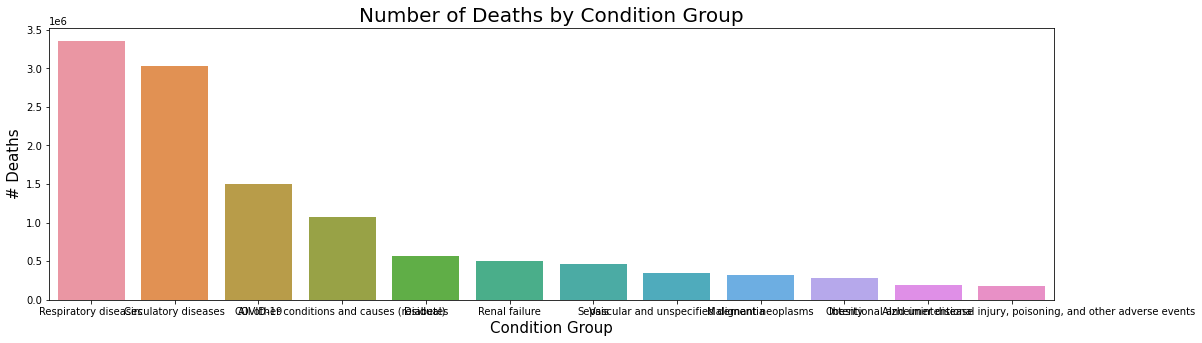

In [11]:
fig=plt.figure(figsize=(18, 5))

death_toll=df.groupby('Condition Group')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by='COVID deaths', inplace=True, ascending=False)

sns.barplot(death_toll['Condition Group'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize=20)
plt.xlabel('Condition Group', fontsize=15)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


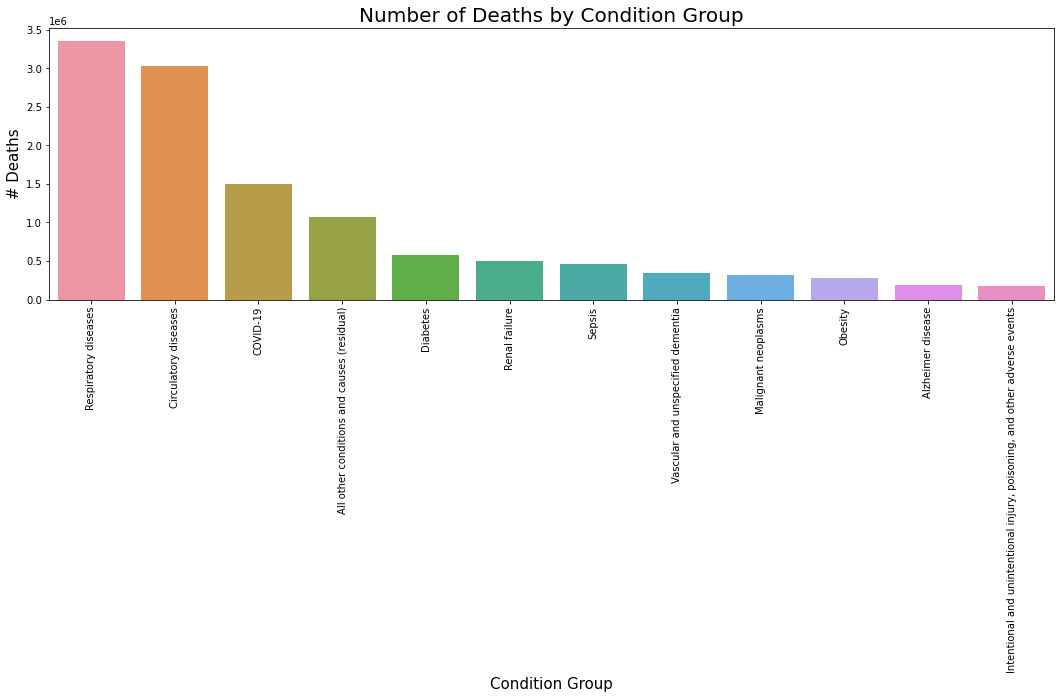

In [12]:
fig=plt.figure(figsize=(18, 5))

death_toll=df.groupby('Condition Group')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by='COVID deaths', inplace=True, ascending=False)

sns.barplot(death_toll['Condition Group'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize=20)
plt.xlabel('Condition Group', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

In [13]:
# Break group name into separate lines for graphing
df['Condition Group Name']=df['Condition Group'].str.replace(' ', '\n')

                                 Condition Group Name  COVID deaths
9                               Respiratory\ndiseases       3355020
3                               Circulatory\ndiseases       3032879
2                                            COVID-19       1503701
0     All\nother\nconditions\nand\ncauses\n(residual)       1070651
4                                            Diabetes        571522
8                                      Renal\nfailure        498350
10                                             Sepsis        465372
11               Vascular\nand\nunspecified\ndementia        347161
6                                Malignant\nneoplasms        322899
7                                             Obesity        281877
1                                  Alzheimer\ndisease        186758
5   Intentional\nand\nunintentional\ninjury,\npois...        174672


/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


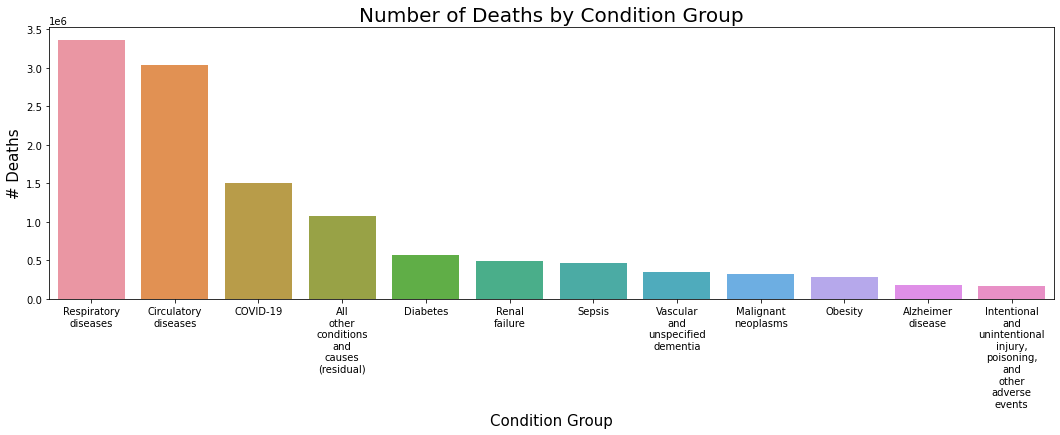

In [14]:
fig=plt.figure(figsize=(18, 5))

death_toll=df.groupby('Condition Group Name')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by='COVID deaths', inplace=True, ascending=False)
death_toll['COVID deaths']=death_toll['COVID deaths'].astype(int)
print(death_toll)

sns.barplot(death_toll['Condition Group Name'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize=20)
plt.xlabel('Condition Group', fontsize=15)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

In [15]:
df.groupby('Condition')['COVID deaths'].sum()

Condition
Adult respiratory distress syndrome                                           451718.0
All other conditions and causes (residual)                                   1070651.0
Alzheimer disease                                                             186758.0
COVID-19                                                                     1503701.0
Cardiac arrest                                                                456530.0
Cardiac arrhythmia                                                            389848.0
Cerebrovascular diseases                                                      285706.0
Chronic lower respiratory diseases                                            446896.0
Diabetes                                                                      571522.0
Heart failure                                                                 401694.0
Hypertensive diseases                                                         628664.0
Influenza and pneumonia          

                                       condition name  COVID deaths
3                                            COVID-19       1503701
1     All\nother\nconditions\nand\ncauses\n(residual)       1070651
11                          Influenza\nand\npneumonia       1065135
20                               Respiratory\nfailure        953729
10                             Hypertensive\ndiseases        628664
8                                            Diabetes        571522
18                                     Renal\nfailure        498350
13                           Ischemic\nheart\ndisease        470019
21                                             Sepsis        465372
4                                     Cardiac\narrest        456530
0              Adult\nrespiratory\ndistress\nsyndrome        451718
7               Chronic\nlower\nrespiratory\ndiseases        446896
9                                      Heart\nfailure        401694
16      Other\ndiseases\nof\nthe\ncirculatory\ns

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


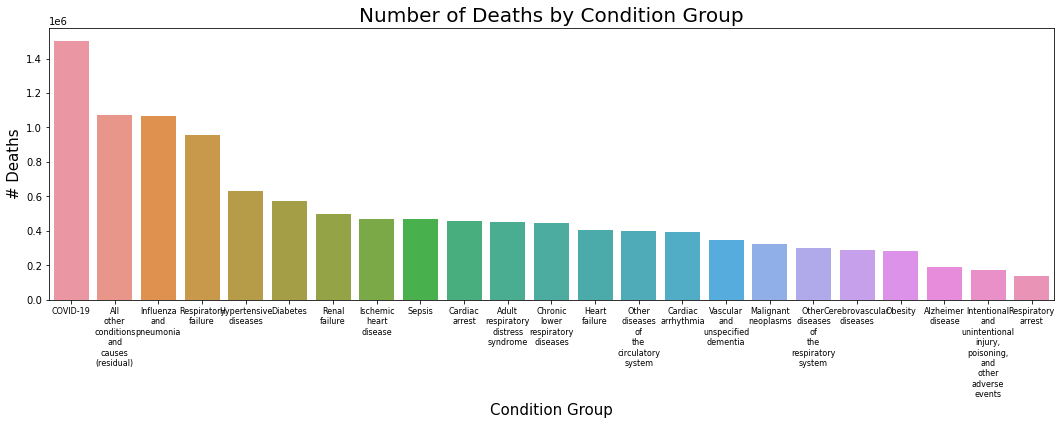

In [16]:
fig=plt.figure(figsize=(18, 5))

df['condition name']=df['Condition'].str.replace(' ', '\n')

death_toll=df.groupby('condition name')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by='COVID deaths', inplace=True, ascending=False)
death_toll['COVID deaths']=death_toll['COVID deaths'].astype(int)
print(death_toll)

sns.barplot(death_toll['condition name'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize=20)
plt.xlabel('Condition Group', fontsize=15)
plt.xticks(fontsize=8)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

In [17]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia


In [18]:
df_temp=df.groupby(['Condition Group', 'Condition'])['COVID deaths'].sum().reset_index()
df_temp.head(100)

,Condition Group,Condition,COVID deaths
0,All other conditions and causes (residual),All other conditions and causes (residual),1070651.0
1,Alzheimer disease,Alzheimer disease,186758.0
2,COVID-19,COVID-19,1503701.0
3,Circulatory diseases,Cardiac arrest,456530.0
4,Circulatory diseases,Cardiac arrhythmia,389848.0
5,Circulatory diseases,Cerebrovascular diseases,285706.0
6,Circulatory diseases,Heart failure,401694.0
7,Circulatory diseases,Hypertensive diseases,628664.0
8,Circulatory diseases,Ischemic heart disease,470019.0
9,Circulatory diseases,Other diseases of the circulatory system,400418.0


* Conditin is a subset of Condition Group.

In [19]:
# check ICD10 codes to see whether they will be useful
df.groupby('ICD10_codes')['COVID deaths'].sum()

ICD10_codes
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99    1070651.0
A40-A41                                                                                                                                                                                  465372.0
C00-C97                                                                                                                                                                                  322899.0
E10-E14                                                                                                                                                                                  571522.0
E65-E68                                                                                                                                                                                  281877.0
F01, F03          

In [20]:
df_check=df[df['ICD10_codes'].str.strip()=='J09-J18']
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20520 entries, 0 to 464479
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data As Of            20520 non-null  object 
 1   Start Date            20520 non-null  object 
 2   End Date              20520 non-null  object 
 3   Group                 20520 non-null  object 
 4   Year                  19980 non-null  object 
 5   Month                 18360 non-null  float64
 6   State                 20520 non-null  object 
 7   Condition Group       20520 non-null  object 
 8   Condition             20520 non-null  object 
 9   ICD10_codes           20520 non-null  object 
 10  Age Group             20520 non-null  object 
 11  COVID-19 Deaths       15425 non-null  object 
 12  Number of Mentions    15513 non-null  object 
 13  Flag                  5095 non-null   object 
 14  COVID deaths          14682 non-null  float64
 15  Condition Group Na

In [21]:
df.groupby('Age Group')['COVID deaths'].sum()

Age Group
0-24            48703.0
25-34          147564.0
35-44          335438.0
45-54          686987.0
55-64         1241988.0
65-74         1738505.0
75-84         1924707.0
85+           1870664.0
All Ages      3816051.0
Not stated        255.0
Name: COVID deaths, dtype: float64

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


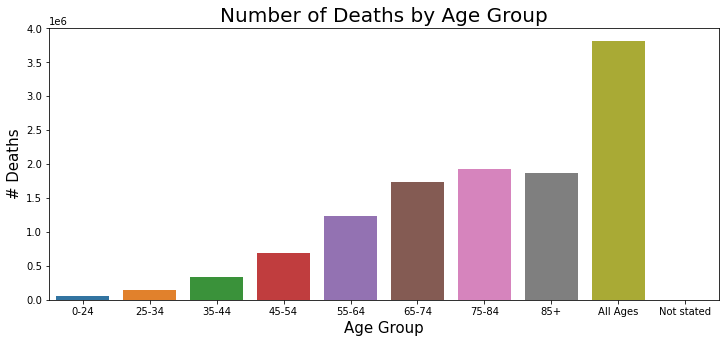

In [22]:
fig=plt.figure(figsize=(12, 5))

df_temp=df.groupby('Age Group')['COVID deaths'].sum().reset_index()

sns.barplot(df_temp['Age Group'], df_temp['COVID deaths'])
plt.title('Number of Deaths by Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


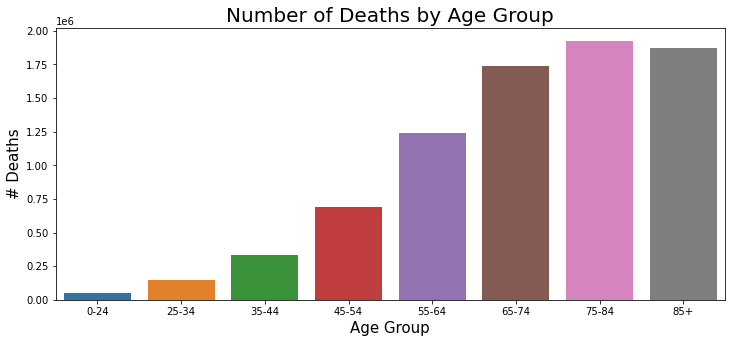

In [23]:
# exclude the last two groups
fig=plt.figure(figsize=(12, 5))

df_temp=df.groupby('Age Group')['COVID deaths'].sum().reset_index()
df_temp=df_temp[~df_temp['Age Group'].isin(['All Ages', 'Not stated'])]

sns.barplot(df_temp['Age Group'], df_temp['COVID deaths'])
plt.title('Number of Deaths by Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

In [24]:
# copy the population data by age group from wikipedia 
# https://en.wikipedia.org/wiki/Demographics_of_the_United_States

pop_0_24=sum([3564, 18827, 60467, 43089])
pop_85_plus=sum([5976, 98])

pop_by_age_group=[pop_0_24, 45495, 43404, 40688, 42803, 55848, 22182, pop_85_plus]

pop_by_age_group=pd.DataFrame(pop_by_age_group)
pop_by_age_group

,0
0,125947
1,45495
2,43404
3,40688
4,42803
5,55848
6,22182
7,6074


In [25]:
# append population data to the dataframe
pop_by_age_group=pd.DataFrame(pop_by_age_group)
df_temp['population']=pop_by_age_group*1000

In [26]:
df_temp.head(30)

,Age Group,COVID deaths,population
0,0-24,48703.0,125947000
1,25-34,147564.0,45495000
2,35-44,335438.0,43404000
3,45-54,686987.0,40688000
4,55-64,1241988.0,42803000
5,65-74,1738505.0,55848000
6,75-84,1924707.0,22182000
7,85+,1870664.0,6074000


/Users/dunpeigan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


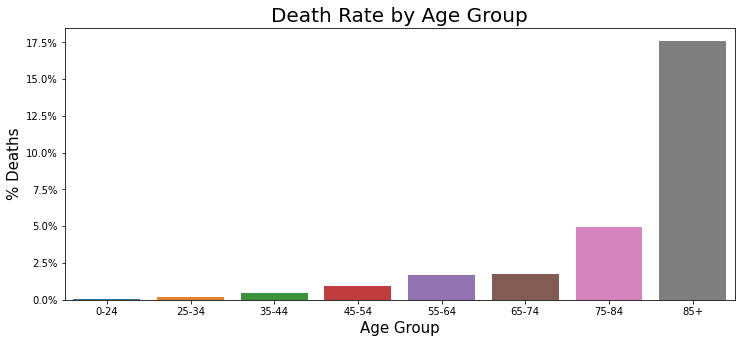

In [27]:
# Calculate the death rate by age group
# The death data is from 2020/01 to 2022/09, which is 1.75 years.

import matplotlib.ticker as mtick

df_temp['death_rate']=(df_temp['COVID deaths']/1.75)/df_temp['population']

fig=plt.figure(figsize=(12, 5))

sns.barplot(df_temp['Age Group'], df_temp['death_rate'])
plt.title('Death Rate by Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('% Deaths', fontsize=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

In [28]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia


In [29]:
df.groupby('Start Date')['COVID deaths'].sum()

Start Date
01/01/2020    2618556.0
01/01/2021    1730254.0
01/01/2022    1422783.0
02/01/2020        140.0
02/01/2021     315380.0
02/01/2022     360095.0
03/01/2020      63177.0
03/01/2021     190104.0
03/01/2022     146910.0
04/01/2020     297170.0
04/01/2021     159247.0
04/01/2022      71037.0
05/01/2020     253982.0
05/01/2021     134235.0
05/01/2022      79594.0
06/01/2020     150006.0
06/01/2021      85184.0
06/01/2022      92220.0
07/01/2020     207276.0
07/01/2021     102168.0
07/01/2022     118861.0
08/01/2020     210929.0
08/01/2021     295935.0
08/01/2022     122414.0
09/01/2020     161241.0
09/01/2021     380768.0
09/01/2022      76053.0
10/01/2020     199761.0
10/01/2021     312868.0
10/01/2022          0.0
11/01/2020     356369.0
11/01/2021     256956.0
12/01/2020     518167.0
12/01/2021     321022.0
Name: COVID deaths, dtype: float64

In [30]:
df.groupby('End Date')['COVID deaths'].sum()

End Date
01/31/2020         50.0
01/31/2021     505658.0
01/31/2022     503414.0
02/28/2021     315380.0
02/28/2022     360095.0
02/29/2020        140.0
03/31/2020      63177.0
03/31/2021     190104.0
03/31/2022     146910.0
04/30/2020     297170.0
04/30/2021     159247.0
04/30/2022      71037.0
05/31/2020     253982.0
05/31/2021     134235.0
05/31/2022      79594.0
06/30/2020     150006.0
06/30/2021      85184.0
06/30/2022      92220.0
07/31/2020     207276.0
07/31/2021     102168.0
07/31/2022     118861.0
08/31/2020     210929.0
08/31/2021     295935.0
08/31/2022     122414.0
09/30/2020     161241.0
09/30/2021     380768.0
09/30/2022      76053.0
10/01/2022    2461935.0
10/31/2020     199761.0
10/31/2021     312868.0
11/30/2020     356369.0
11/30/2021     256956.0
12/31/2020    1594107.0
12/31/2021    1545618.0
Name: COVID deaths, dtype: float64

In [31]:
df['Start Dt']=pd.to_datetime(df['Start Date'], errors='coerce')

In [32]:
df.head(20)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
5,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,"123,441","127,232",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
6,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,"129,752","132,741",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
7,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,"110,444","112,000",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
8,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,10,10,NaN,10.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
9,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,"502,378","515,926",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01


In [33]:
df['year']=df['Start Dt'].dt.year
df['month']=df['Start Dt'].dt.month

df.head(20)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt,year,month
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
5,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,"123,441","127,232",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
6,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,"129,752","132,741",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
7,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,"110,444","112,000",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
8,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,10,10,NaN,10.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
9,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,"502,378","515,926",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1


In [34]:
def assign_season(x):
    if x in (3, 4, 5):
        return 'a.Spring'
    elif x in (6, 7, 8, 9):
        return 'b.Summer'
    elif x in (10, 11):
        return 'c.Fall'
    else: 
        return 'd.Winter'
    
df['season']=df['month'].apply(assign_season)

In [35]:
df.groupby('season')['COVID deaths'].count()

season
a.Spring     74516
b.Summer     98883
c.Fall       45738
d.Winter    112702
Name: COVID deaths, dtype: int64

In [36]:
df.head(20)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,...,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt,year,month,season
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"1,426","1,491",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"5,641","5,853",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"14,719","15,324",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"36,629","38,057",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"80,316","83,218",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
5,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"123,441","127,232",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
6,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"129,752","132,741",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
7,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"110,444","112,000",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
8,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,10,10,NaN,10.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter
9,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"502,378","515,926",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter


In [37]:
df['year_month']=df['year']*100+df['month']
df=df[(df['year_month'] >= 202001) & (df['year_month'] <= 202209)]

# make year and month into string for plotting
df['year_month']=df['year_month'].astype(str)

In [38]:
df.head(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,...,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt,year,month,season,year_month
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"1,491",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"5,853",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"15,324",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"38,057",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"83,218",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
5,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"127,232",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
6,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"132,741",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
7,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"112,000",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
8,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,10,NaN,10.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
9,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,...,"515,926",NaN,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001


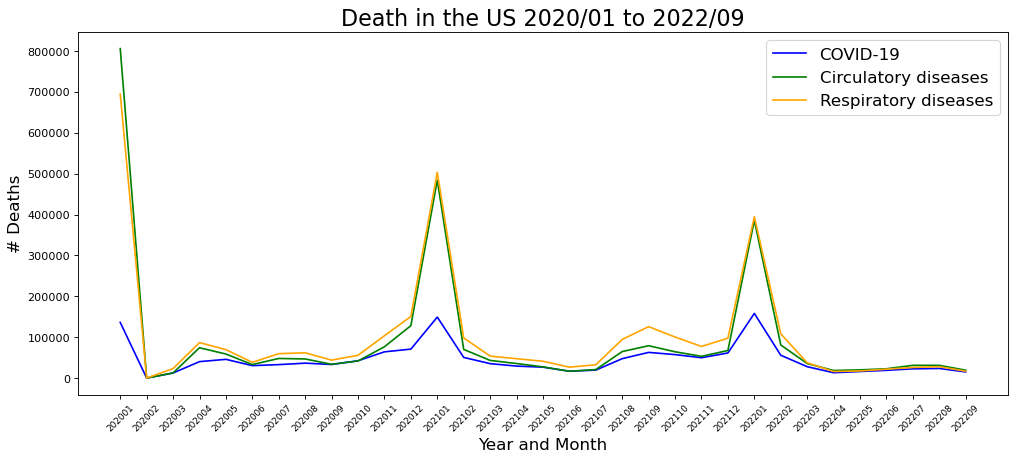

In [39]:
figure(figsize=(15, 6), dpi=80)

df2=df.groupby(['year_month', 'Condition Group'])['COVID deaths'].sum().reset_index()

df_covid=df2[df2['Condition Group']=='COVID-19']
df_circulatory=df2[df2['Condition Group']=='Circulatory diseases']
df_respiratory=df2[df2['Condition Group']=='Respiratory diseases']



plt.plot(df_covid['year_month'], df_covid['COVID deaths'], color='b', label='COVID-19')
plt.plot(df_circulatory['year_month'], df_circulatory['COVID deaths'], color='g', label='Circulatory diseases')
plt.plot(df_respiratory['year_month'], df_respiratory['COVID deaths'], color='orange', label='Respiratory diseases')
plt.title('Death in the US 2020/01 to 2022/09', fontsize=20)
plt.xlabel('Year and Month', fontsize=15)
plt.ylabel('# Deaths', fontsize=15)
plt.xticks(rotation=45, fontsize=8)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [40]:
df2=df.groupby(['year_month', 'Condition Group'])['COVID deaths'].sum()

# unstack the `condition group` index, to place it as columns
df3 = df2.unstack(level='Condition Group')

df3.columns.name = 'Causes of Deaths'

df3.head(10)

Causes of Deaths,All other conditions and causes (residual),Alzheimer disease,COVID-19,Circulatory diseases,Diabetes,"Intentional and unintentional injury, poisoning, and other adverse events",Malignant neoplasms,Obesity,Renal failure,Respiratory diseases,Sepsis,Vascular and unspecified dementia
year_month,,,,,,,,,,,,
202001,160840.0,75828.0,136180.0,806003.0,149037.0,60088.0,94822.0,85746.0,134763.0,694902.0,124683.0,95664.0
202002,8.0,0.0,38.0,28.0,10.0,4.0,2.0,4.0,0.0,40.0,4.0,2.0
202003,5260.0,225.0,12421.0,12688.0,2657.0,161.0,920.0,722.0,1718.0,23280.0,2259.0,866.0
202004,27738.0,3866.0,40272.0,74227.0,16085.0,2294.0,6698.0,4604.0,10263.0,86840.0,10254.0,14029.0
202005,25219.0,3556.0,45851.0,58799.0,12074.0,1895.0,4292.0,2552.0,8998.0,69578.0,9688.0,11480.0
202006,14792.0,3009.0,30488.0,33053.0,8793.0,995.0,2897.0,2435.0,4502.0,38510.0,4870.0,5662.0
202007,18159.0,3155.0,32954.0,48007.0,9726.0,1981.0,3434.0,5225.0,8285.0,59732.0,9075.0,7543.0
202008,18800.0,3404.0,36511.0,46786.0,10684.0,1513.0,3211.0,3790.0,8798.0,61827.0,9168.0,6437.0
202009,15708.0,3151.0,33316.0,33733.0,8580.0,1102.0,3056.0,2634.0,5424.0,43937.0,6292.0,4308.0


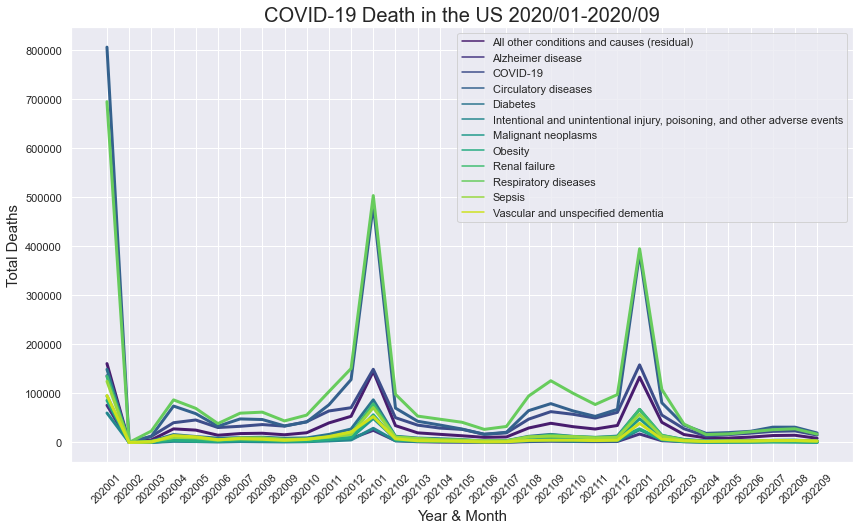

In [41]:
import seaborn as sns

df4=df.groupby(['year_month', 'Condition Group'])['COVID deaths'].sum().reset_index()

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df4, x ='year_month', y = 'COVID deaths',
                  hue='Condition Group', palette='viridis',
                  legend='full', lw=3)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.ylabel('Total Deaths', fontsize=15)
plt.xlabel('Year & Month', fontsize=15)
plt.title('COVID-19 Death in the US 2020/01-2020/09', fontsize=20)
plt.show()

In [42]:
#from sys import exit
#exit()

# Part 3: Compare state level data

In [43]:
df_state=df.groupby('State')['COVID deaths'].sum().reset_index()

In [44]:
# read in population data by state
population=pd.read_excel(path+'state_data.xls', sheet_name='population')
population.head() 
# change 'Washington, D.C.' to 'District of Columbia'
population['State']=np.where(population['State'].str.contains('D.C'), 'District of Columbia', population['State'])

In [45]:
population_density=pd.read_excel(path+'state_data.xls', sheet_name='population_density')
population_density.head()

,Rank,State,Population Density
0,NaN,All United States,93.970
1,1.0,"Washington, D. C.",10975.429
2,2.0,New Jersey,1260.110
3,3.0,Rhode Island,1059.778
4,4.0,Massachusetts,895.470


In [46]:
# Washingotn DC can named as Washington D.C. or District of Columbia sometimes. 
# For consistency we want to change it District of Columbia to help with file merging later
def change_DC(df):
    df['State']=np.where(df['State'].str.contains("Washington,"), 'District of Columbia', df['State'])
    return df['State']
    
change_DC(population_density)

0        All United States
1     District of Columbia
2               New Jersey
3             Rhode Island
4            Massachusetts
5              Connecticut
6                 Maryland
7                 Delaware
8                 New York
9                  Florida
10            Pennsylvania
11                    Ohio
12              California
13                Illinois
14                  Hawaii
15                Virginia
16          North Carolina
17                 Indiana
18                 Georgia
19                Michigan
20          South Carolina
21               Tennessee
22           New Hampshire
23              Washington
24                Kentucky
25                   Texas
26               Wisconsin
27               Louisiana
28                 Alabama
29                Missouri
30           West Virginia
31               Minnesota
32                 Vermont
33                 Arizona
34             Mississippi
35                Arkansas
36                Oklahoma
3

In [47]:
# drop the first row in the following way: if Rank is missing, delete the row
population_density=population_density[~population_density['Rank'].isnull()]
population_density.head(60)

,Rank,State,Population Density
1,1.0,District of Columbia,10975.4290
2,2.0,New Jersey,1260.1100
3,3.0,Rhode Island,1059.7780
4,4.0,Massachusetts,895.4700
5,5.0,Connecticut,744.5940
6,6.0,Maryland,635.1062
7,7.0,Delaware,514.9410
8,8.0,New York,420.9080
9,9.0,Florida,403.9170
10,10.0,Pennsylvania,289.7460


In [48]:
# merge population and population density
population2=pd.merge(population, population_density, on='State', how='inner')
population2.head(55)

,Rank_x,State,Population in 2021,Population in 2020,Rank_y,Population Density
0,24.0,Alabama,5039877,5024279,28.0,99.5130
1,48.0,Alaska,732673,733391,51.0,1.2830
2,14.0,Arizona,7276316,7151502,33.0,64.0550
3,33.0,Arkansas,3025891,3011524,35.0,58.1500
4,1.0,California,39237836,39538223,12.0,251.8810
5,21.0,Colorado,5812069,5773714,38.0,56.0780
6,29.0,Connecticut,3605597,3605944,5.0,744.5940
7,45.0,Delaware,1003384,989948,7.0,514.9410
8,3.0,Florida,21781128,21538187,9.0,403.9170
9,8.0,Georgia,10799566,10711908,18.0,187.7740


In [49]:
state_abbreviation=pd.read_csv(path+'state_name_abbreviation.csv')
state_abbreviation.head(50)

,State,State Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


* The above table has DC missing.  We need to fill it in. 

In [50]:
# make a single-row dataframe for DC
DC_data=pd.DataFrame()
DC_data['State']='District of Columbia'
DC_data['State Abbreviation']='DC'
#DC_data.columns=[['State', 'State Abbreviation']]
DC_data.head(5)

,State,State Abbreviation


In [51]:
# append Washington DC to the list
state_abbreviation=pd.concat([state_abbreviation, DC_data]).reset_index()
state_abbreviation.head(55)

,index,State,State Abbreviation
0,0,Alabama,AL
1,1,Alaska,AK
2,2,Arizona,AZ
3,3,Arkansas,AR
4,4,California,CA
5,5,Colorado,CO
6,6,Connecticut,CT
7,7,Delaware,DE
8,8,Florida,FL
9,9,Georgia,GA


In [52]:
# Merge with state abbreviation file
population_state=pd.merge(population2, state_abbreviation, on='State', how='inner')
population_state.head(55)

,Rank_x,State,Population in 2021,Population in 2020,Rank_y,Population Density,index,State Abbreviation
0,24.0,Alabama,5039877,5024279,28.0,99.5130,0,AL
1,48.0,Alaska,732673,733391,51.0,1.2830,1,AK
2,14.0,Arizona,7276316,7151502,33.0,64.0550,2,AZ
3,33.0,Arkansas,3025891,3011524,35.0,58.1500,3,AR
4,1.0,California,39237836,39538223,12.0,251.8810,4,CA
5,21.0,Colorado,5812069,5773714,38.0,56.0780,5,CO
6,29.0,Connecticut,3605597,3605944,5.0,744.5940,6,CT
7,45.0,Delaware,1003384,989948,7.0,514.9410,7,DE
8,3.0,Florida,21781128,21538187,9.0,403.9170,8,FL
9,8.0,Georgia,10799566,10711908,18.0,187.7740,9,GA


In [53]:
# sum death data to the state level
df_covid=df.groupby('State')['COVID deaths'].sum().reset_index()

In [54]:
#merge death data with state data
df_covid=pd.merge(df_covid, population_state, on='State', how='inner')
df_covid.head(55)

,State,COVID deaths,Rank_x,Population in 2021,Population in 2020,Rank_y,Population Density,index,State Abbreviation
0,Alabama,230907.0,24.0,5039877,5024279,28.0,99.5130,0,AL
1,Alaska,22546.0,48.0,732673,733391,51.0,1.2830,1,AK
2,Arizona,291305.0,14.0,7276316,7151502,33.0,64.0550,2,AZ
3,Arkansas,165784.0,33.0,3025891,3011524,35.0,58.1500,3,AR
4,California,603491.0,1.0,39237836,39538223,12.0,251.8810,4,CA
5,Colorado,214691.0,21.0,5812069,5773714,38.0,56.0780,5,CO
6,Connecticut,140866.0,29.0,3605597,3605944,5.0,744.5940,6,CT
7,Delaware,54040.0,45.0,1003384,989948,7.0,514.9410,7,DE
8,District of Columbia,43470.0,49.0,670050,689545,1.0,10975.4290,50,DC
9,Florida,502967.0,3.0,21781128,21538187,9.0,403.9170,8,FL


In [55]:
# read in file for party affiliation
party_affiliation=pd.read_csv(path+'party_affiliation_by_state.csv')

In [56]:
party_affiliation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           51 non-null     int64  
 1   index                                                51 non-null     int64  
 2   State                                                51 non-null     object 
 3   2020 presidential election                           50 non-null     object 
 4   Governor                                             50 non-null     object 
 5   State Senate                                         50 non-null     object 
 6   State House                                          50 non-null     object 
 7   Senior US Senator                                    50 non-null     object 
 8   Junior US Senator                                    50 non-null     obj

In [57]:
df_covid=pd.merge(df_covid, party_affiliation, on='State', how='inner')

In [58]:
df_covid.sort_values(by='State Abbreviation', ascending=True)
df_covid.head(55)

,State,COVID deaths,Rank_x,Population in 2021,Population in 2020,Rank_y,Population Density,index_x,State Abbreviation,Unnamed: 0,...,Party registration or identification (% as of 2020),Presidential_election,Gubernatorial_election,state_senate_election,state_house_election,senior_US_senator_election,junior_US_senator_election,US_house_election,party_score,state_party_aff_color
0,Alabama,230907.0,24.0,5039877,5024279,28.0,99.5130,0,AL,0,...,Republican\n52–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,Alaska,22546.0,48.0,732673,733391,51.0,1.2830,1,AK,19,...,Republican\n24–13[d][9],0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.13,0
2,Arizona,291305.0,14.0,7276316,7151502,33.0,64.0550,2,AZ,27,...,Republican\n35–33[d][10],1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.66,2
3,Arkansas,165784.0,33.0,3025891,3011524,35.0,58.1500,3,AR,13,...,Republican\n48–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
4,California,603491.0,1.0,39237836,39538223,12.0,251.8810,4,CA,38,...,Democratic\n45–24[d][11],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,3
5,Colorado,214691.0,21.0,5812069,5773714,38.0,56.0780,5,CO,48,...,Democratic\n30–28[d][12],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,3
6,Connecticut,140866.0,29.0,3605597,3605944,5.0,744.5940,6,CT,42,...,Democratic\n37–21[d][13],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,3
7,Delaware,54040.0,45.0,1003384,989948,7.0,514.9410,7,DE,43,...,Democratic\n48–28[d][14],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,3
8,District of Columbia,43470.0,49.0,670050,689545,1.0,10975.4290,50,DC,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,3
9,Florida,502967.0,3.0,21781128,21538187,9.0,403.9170,8,FL,15,...,Republican\n36–35[d][15],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0


In [59]:
df_covid.groupby('state_party_aff_color')['State'].count()

state_party_aff_color
0    24
1     1
2     8
3    18
Name: State, dtype: int64

* 0 means the state is very red. 3 means the state is very blue.

In [60]:
df_covid['death_per_capita']=df_covid['COVID deaths']/df_covid['Population in 2020']

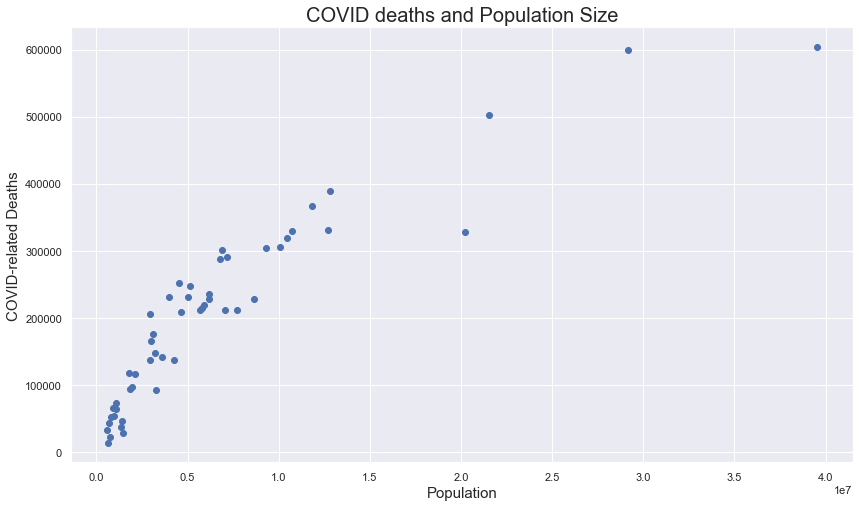

In [61]:
# Scatter plot death and population
plt.scatter(df_covid['Population in 2020'], df_covid['COVID deaths'])
plt.title('COVID deaths and Population Size', fontsize=20)
plt.xlabel('Population', fontsize=15)
plt.ylabel('COVID-related Deaths', fontsize=15)
plt.show()

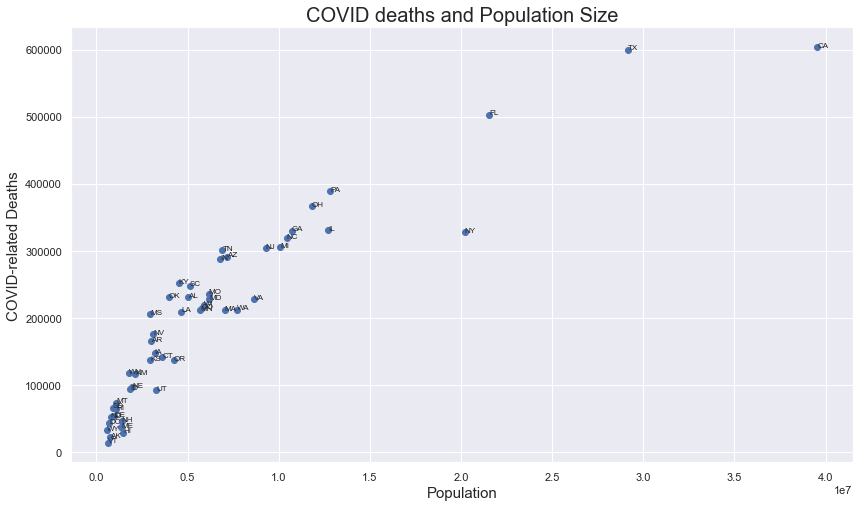

In [62]:
# Scatter plot death and population
import matplotlib.colors as mcol
import matplotlib.cm as cm

annotations=df_covid['State Abbreviation']

plt.scatter(df_covid['Population in 2020'], df_covid['COVID deaths'])
plt.title('COVID deaths and Population Size', fontsize=20)
plt.xlabel('Population', fontsize=15)
plt.ylabel('COVID-related Deaths', fontsize=15)

for i, label in enumerate(annotations):
    plt.annotate(label, (df_covid['Population in 2020'][i], df_covid['COVID deaths'][i]), fontsize=8)
plt.show()

[Text(0.5, 1.0, 'COVID-19-related Death and Population Sizes'),
 Text(0.5, 0, 'Population Size'),
 Text(0, 0.5, 'COVID-19-related Deaths')]

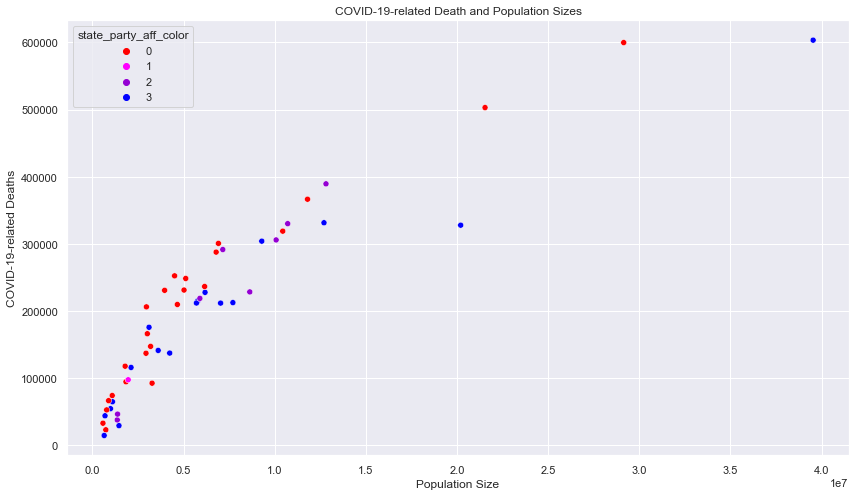

In [63]:
# Scatter plot death and population
import matplotlib.colors as mcol
import matplotlib.cm as cm

# The following line of code provides a continuous spectrum from red to blue
color_dict=dict({0: 'red', 
                 1: 'magenta',
                 2: 'darkviolet',
                 3: 'blue'})
sns.scatterplot(x='Population in 2020', y='COVID deaths', data=df_covid, 
                hue='state_party_aff_color', palette=color_dict).set(title='COVID-19-related Death and Population Sizes', 
                                                                     xlabel='Population Size',
                                                                     ylabel='COVID-19-related Deaths')

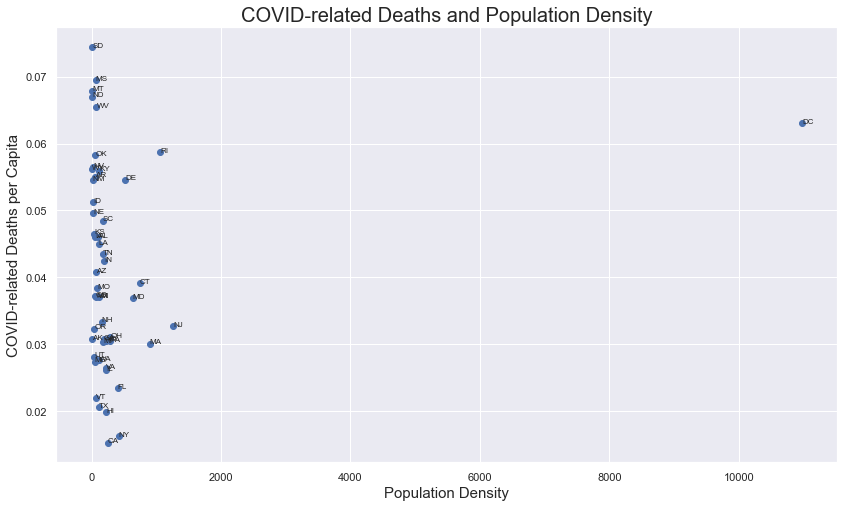

In [64]:
# Scatter plot death and population
annotations=df_covid['State Abbreviation']

plt.scatter(df_covid['Population Density'], df_covid['death_per_capita'])
plt.title('COVID-related Deaths and Population Density', fontsize=20)
plt.xlabel('Population Density', fontsize=15)
plt.ylabel('COVID-related Deaths per Capita', fontsize=15)

for i, label in enumerate(annotations):
    plt.annotate(label, (df_covid['Population Density'][i], df_covid['death_per_capita'][i]), fontsize=8)
plt.show()

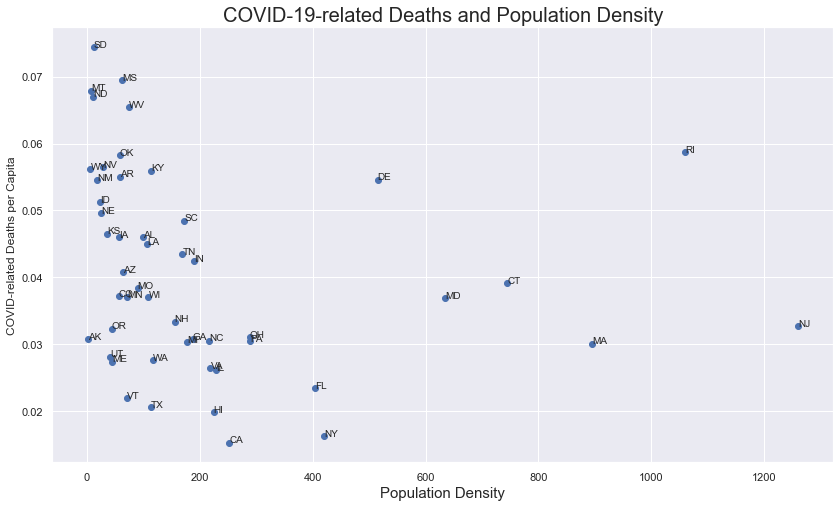

In [65]:
df_covid2=df_covid[df_covid['State Abbreviation'] != 'DC'].reset_index()
annotations=df_covid2['State Abbreviation']

plt.scatter(df_covid2['Population Density'], df_covid2['death_per_capita'])
plt.title('COVID-19-related Deaths and Population Density', fontsize=20)
plt.xlabel('Population Density', fontsize=15)
plt.ylabel('COVID-related Deaths per Capita')

for i, label in enumerate(annotations):
    plt.annotate(label, (df_covid2['Population Density'][i], df_covid2['death_per_capita'][i]), fontsize=10)
plt.show()

[Text(0.5, 1.0, 'COVID-19-related Death and Population Density'),
 Text(0.5, 0, 'Population Density'),
 Text(0, 0.5, 'COVID-19-related Deaths per Capita')]

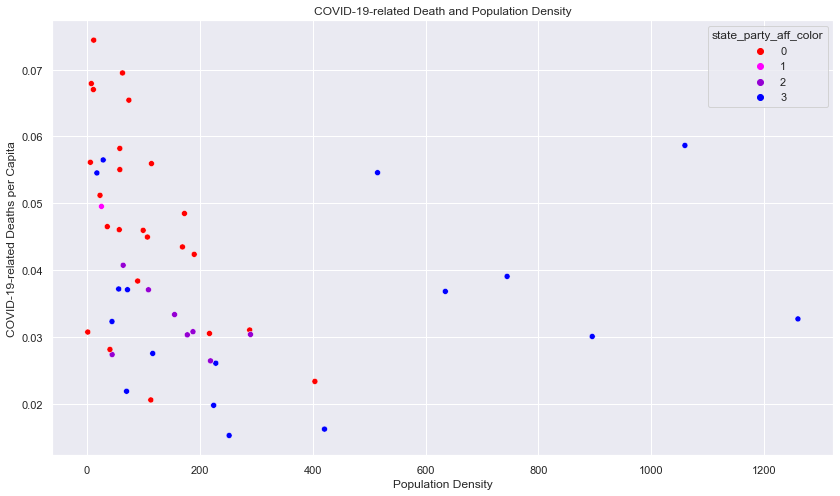

In [66]:
# The following line of code provides a continuous spectrum from red to blue
color_dict=dict({0: 'red', 
                 1: 'magenta',
                 2: 'darkviolet',
                 3: 'blue'})
sns.scatterplot(x='Population Density', y='death_per_capita', data=df_covid2, 
                hue='state_party_aff_color', palette=color_dict).set(title='COVID-19-related Death and Population Density', 
                                                                     xlabel='Population Density',
                                                                     ylabel='COVID-19-related Deaths per Capita')

In [67]:
df_covid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   index                                                50 non-null     int64  
 1   State                                                50 non-null     object 
 2   COVID deaths                                         50 non-null     float64
 3   Rank_x                                               50 non-null     float64
 4   Population in 2021                                   50 non-null     int64  
 5   Population in 2020                                   50 non-null     int64  
 6   Rank_y                                               50 non-null     float64
 7   Population Density                                   50 non-null     float64
 8   index_x                                              50 non-null     int

df_covid2[['party_score', 'Population Density']].corrwith(df_covid2['death_per_capita']).plot.bar(
figsize=(20, 10), title='Correlations with Death Score', rot=45, grid=True)

* Death rate has a moderate correlation with party affiliation. 
* Red states have higher COVID-19-related death rates.

### Install geopandas to generate maps

In [68]:
!pip install geopandas

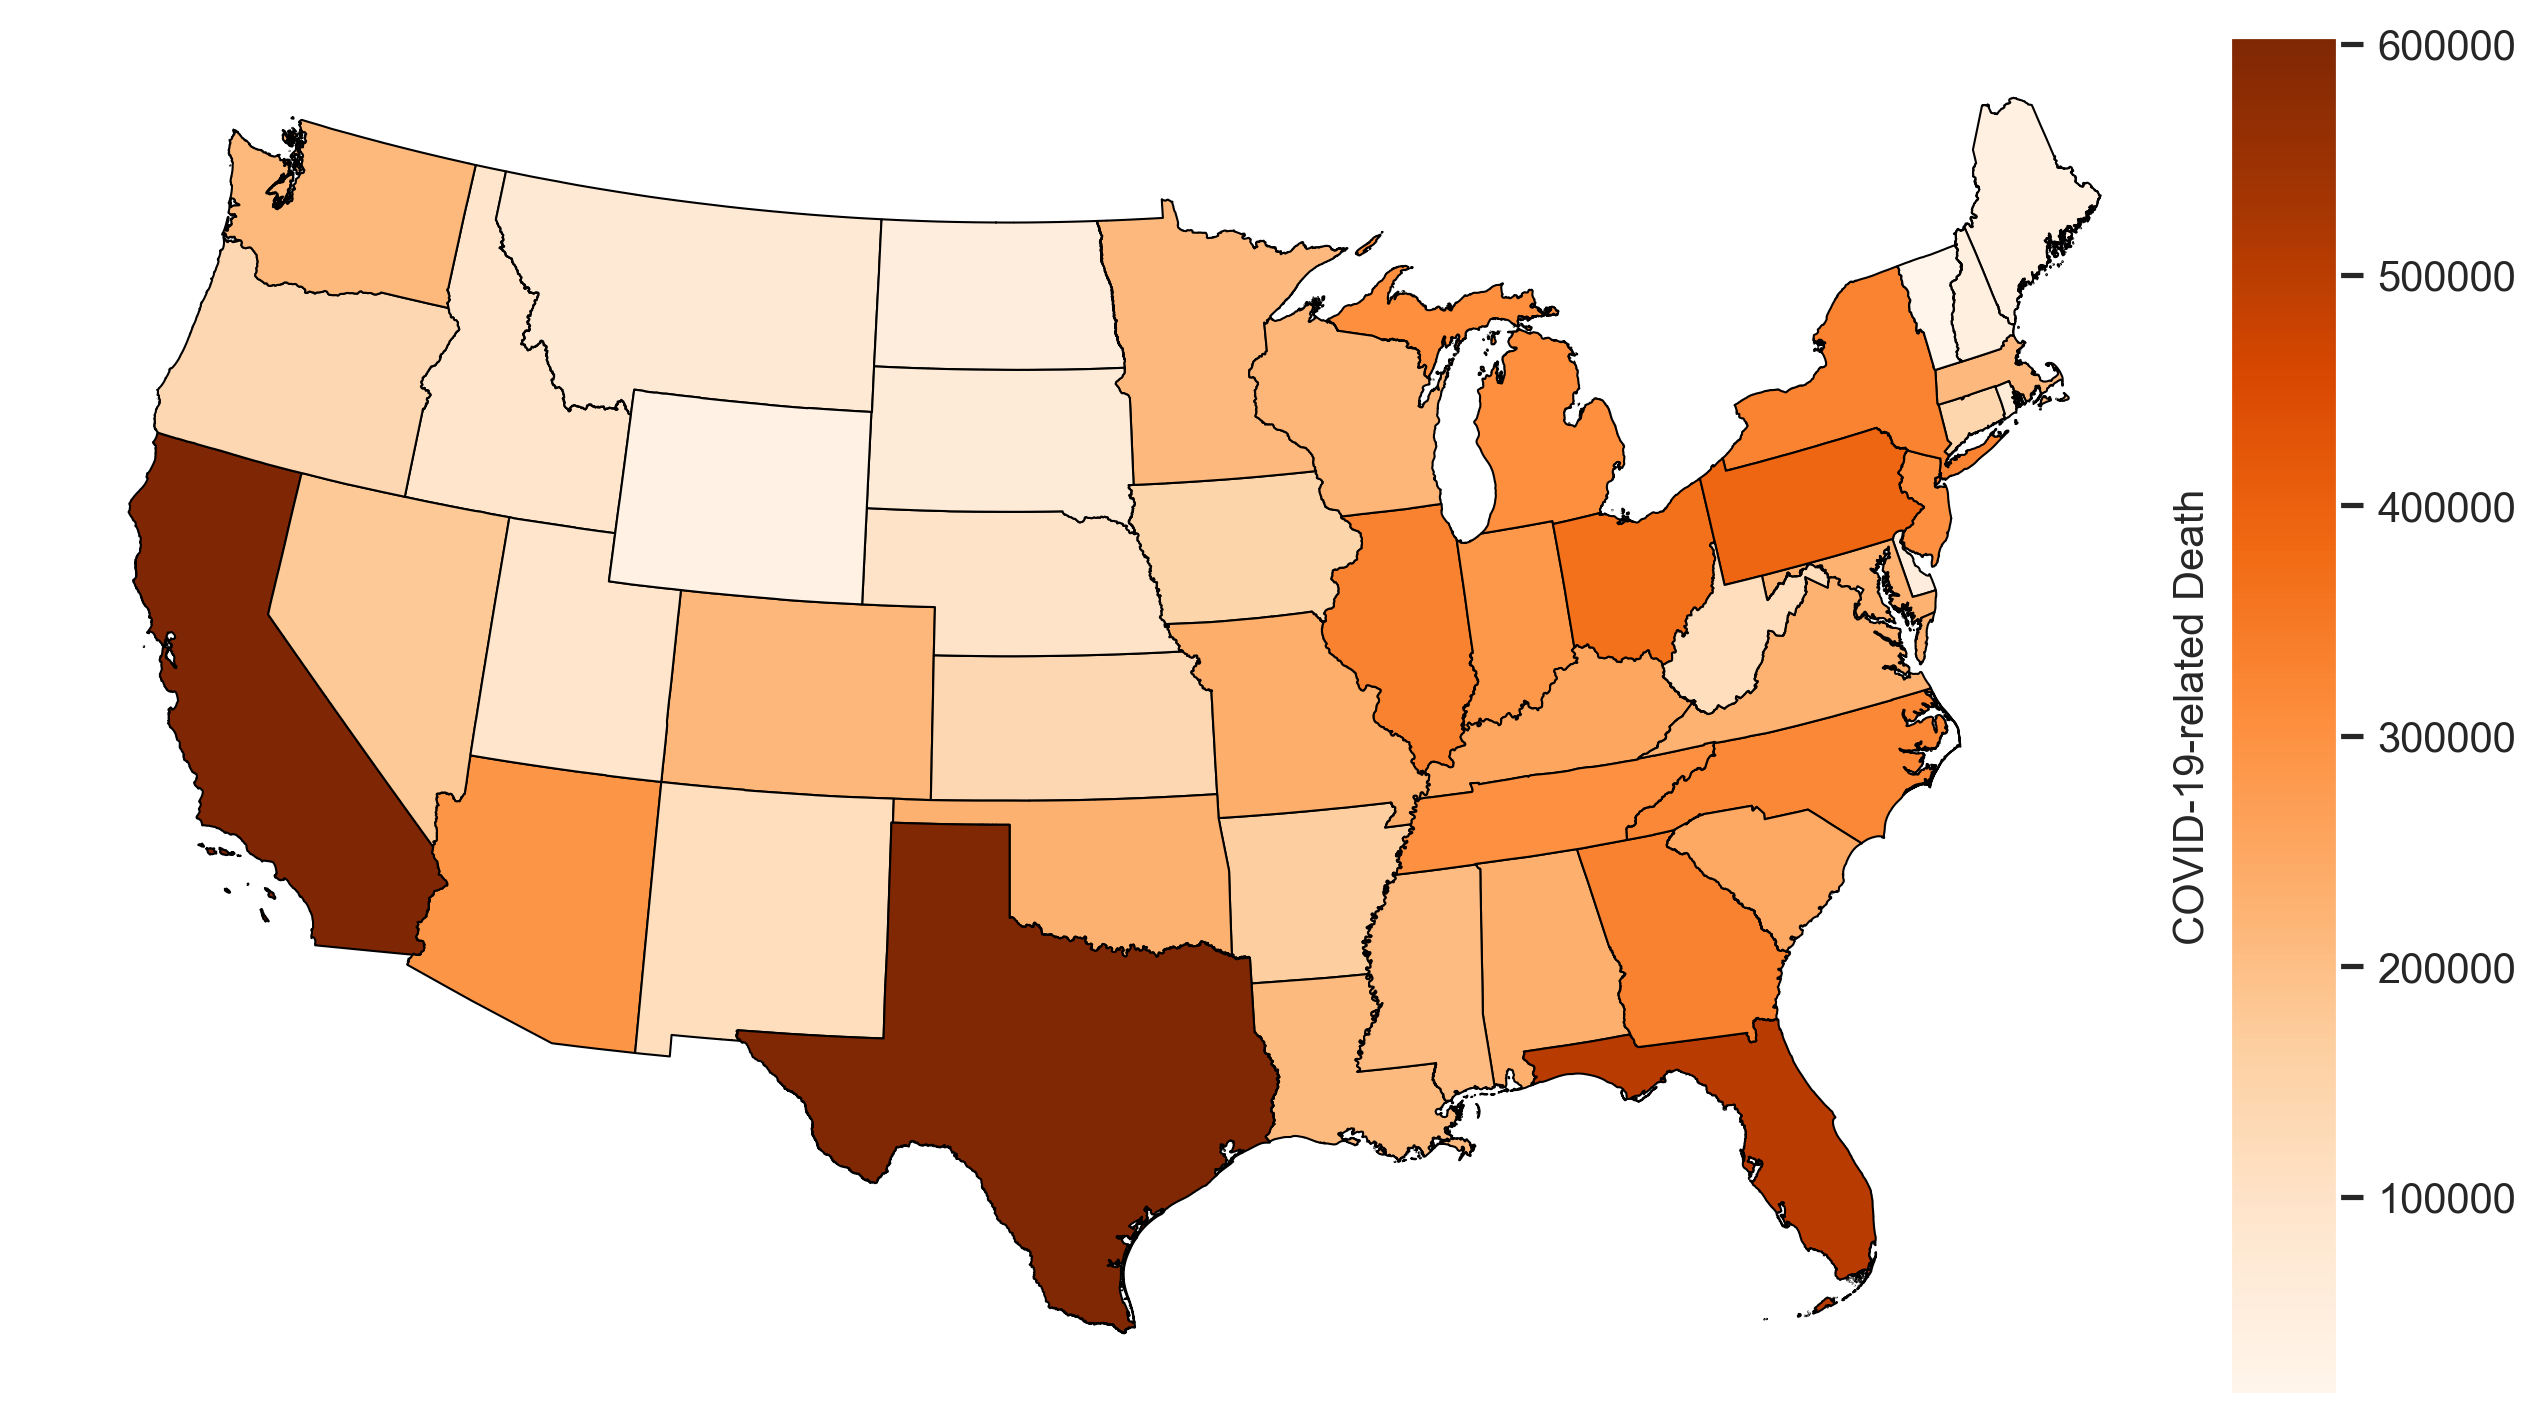

In [70]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

df_covid.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

state_map = gpd.read_file(path+'cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# merging datasets
df_state_map = pd.merge(df_covid, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='COVID deaths', cmap='Oranges', legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('COVID-19-related Death',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

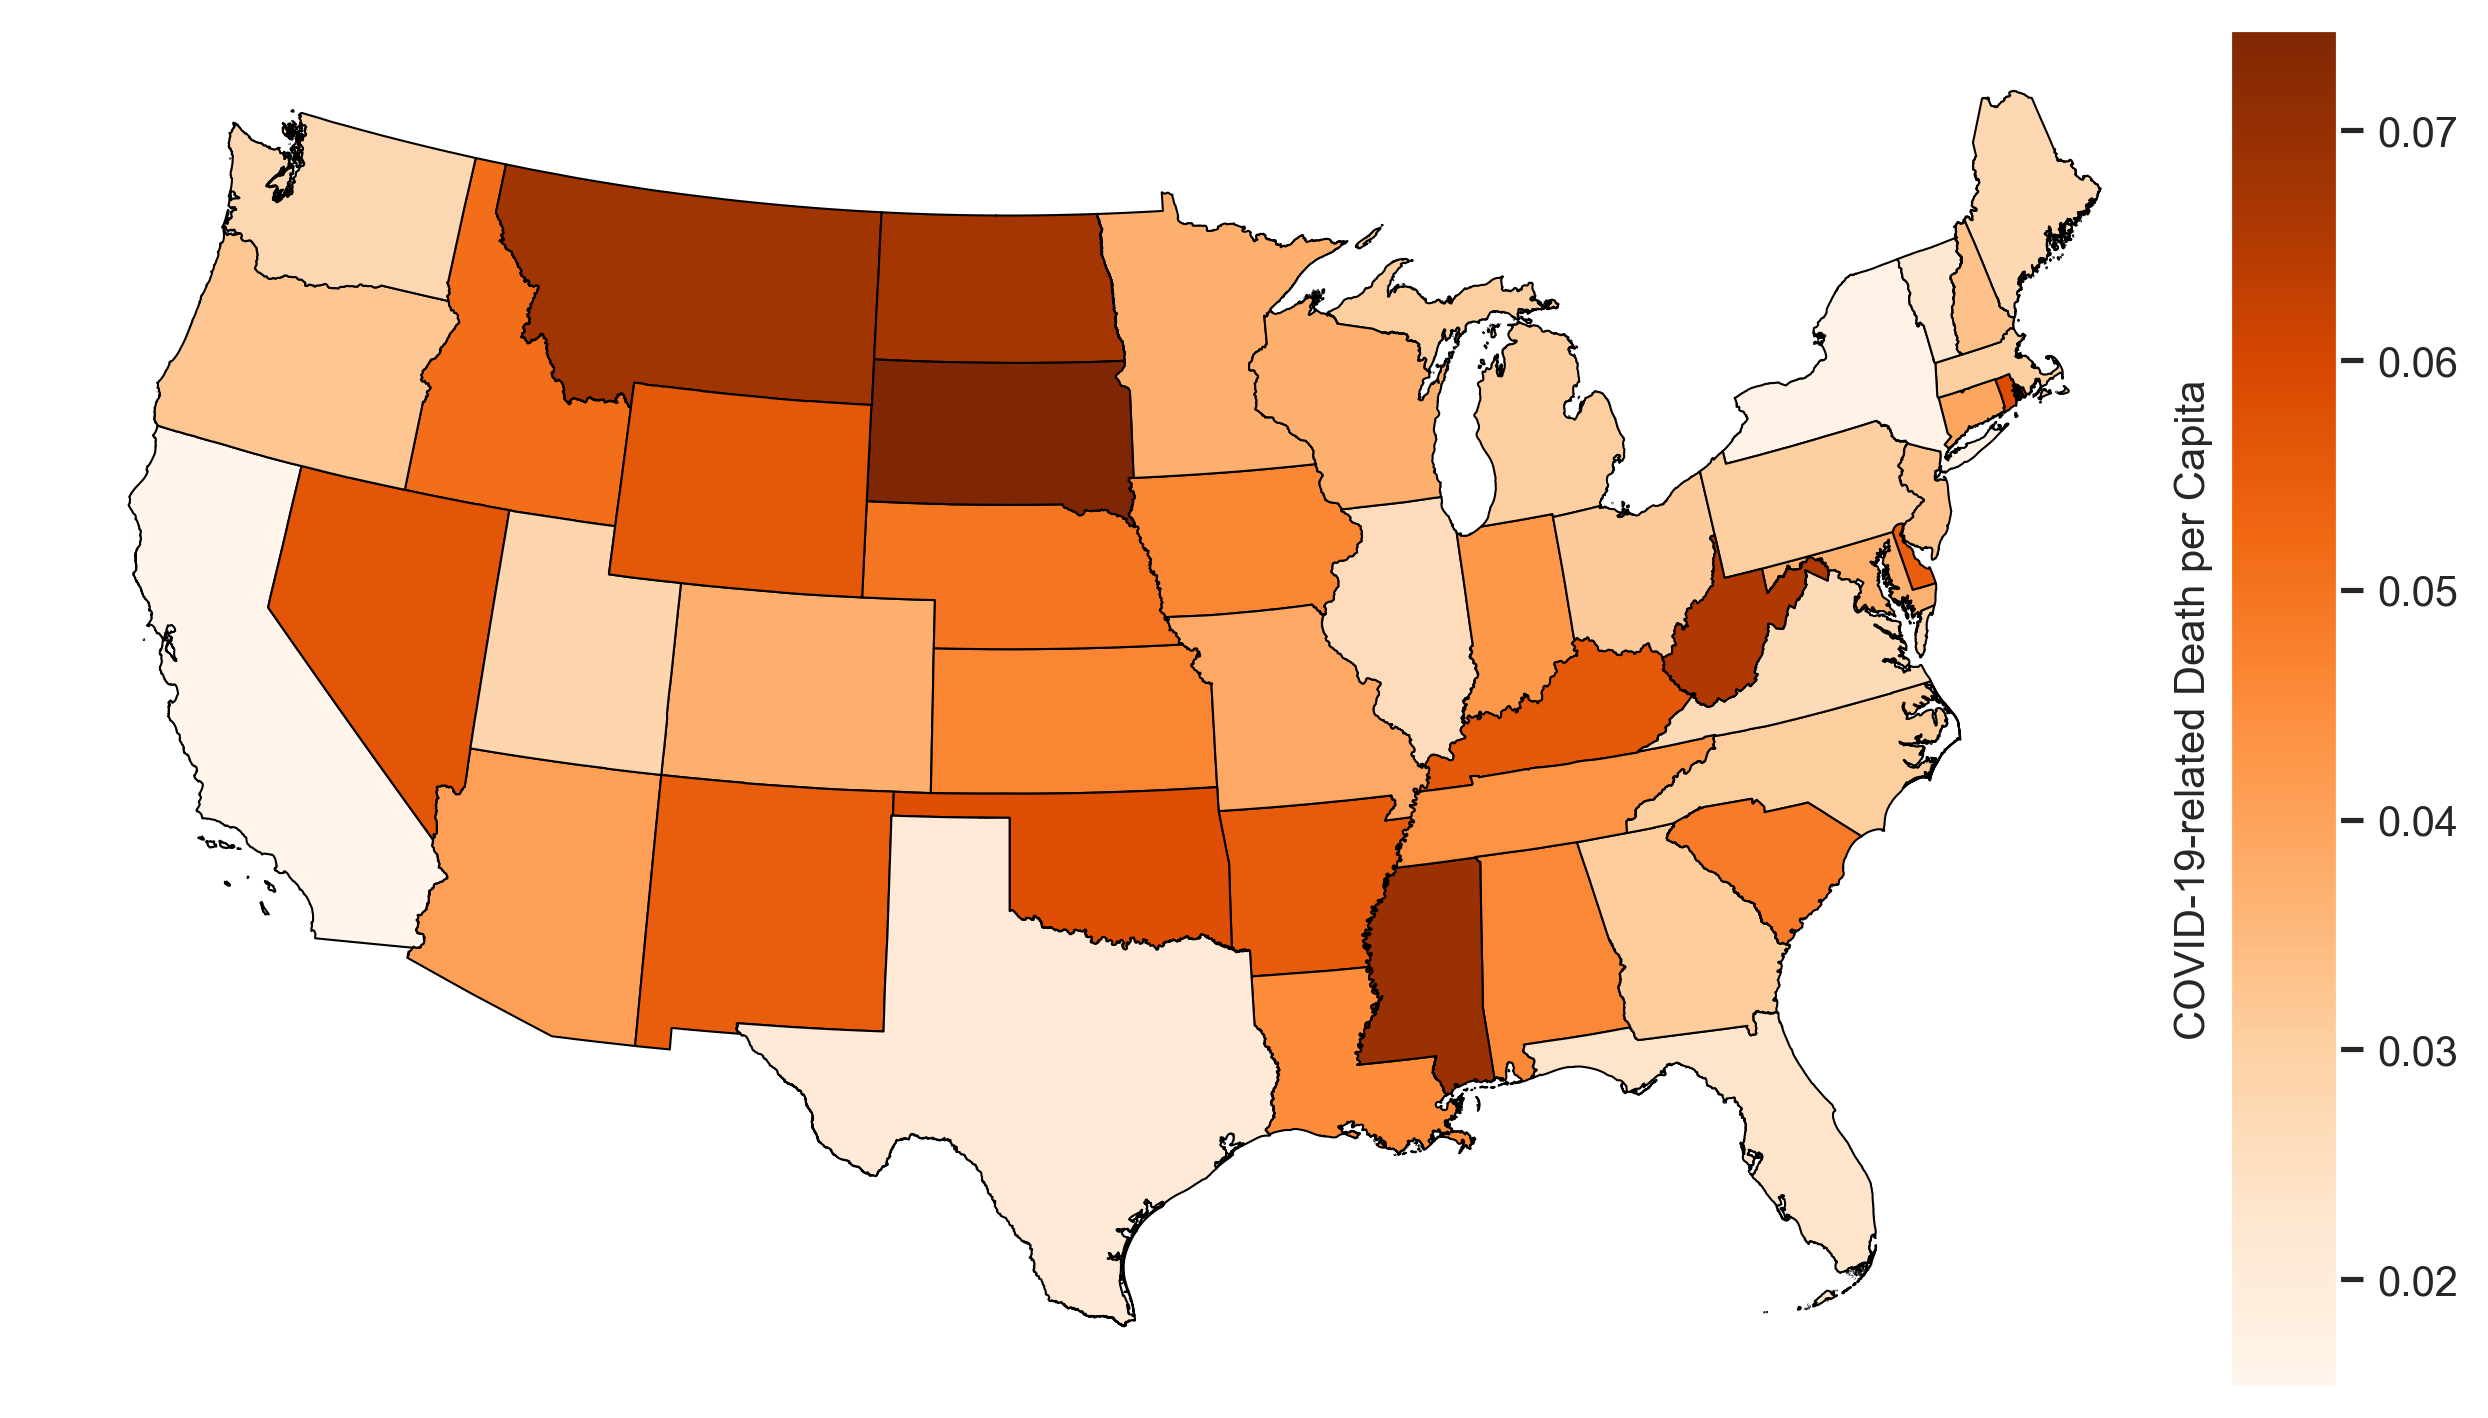

In [71]:
df_covid.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

state_map = gpd.read_file(path+'cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# merging datasets
df_state_map = pd.merge(df_covid, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='death_per_capita', cmap='Oranges', legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('COVID-19-related Death per Capita',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

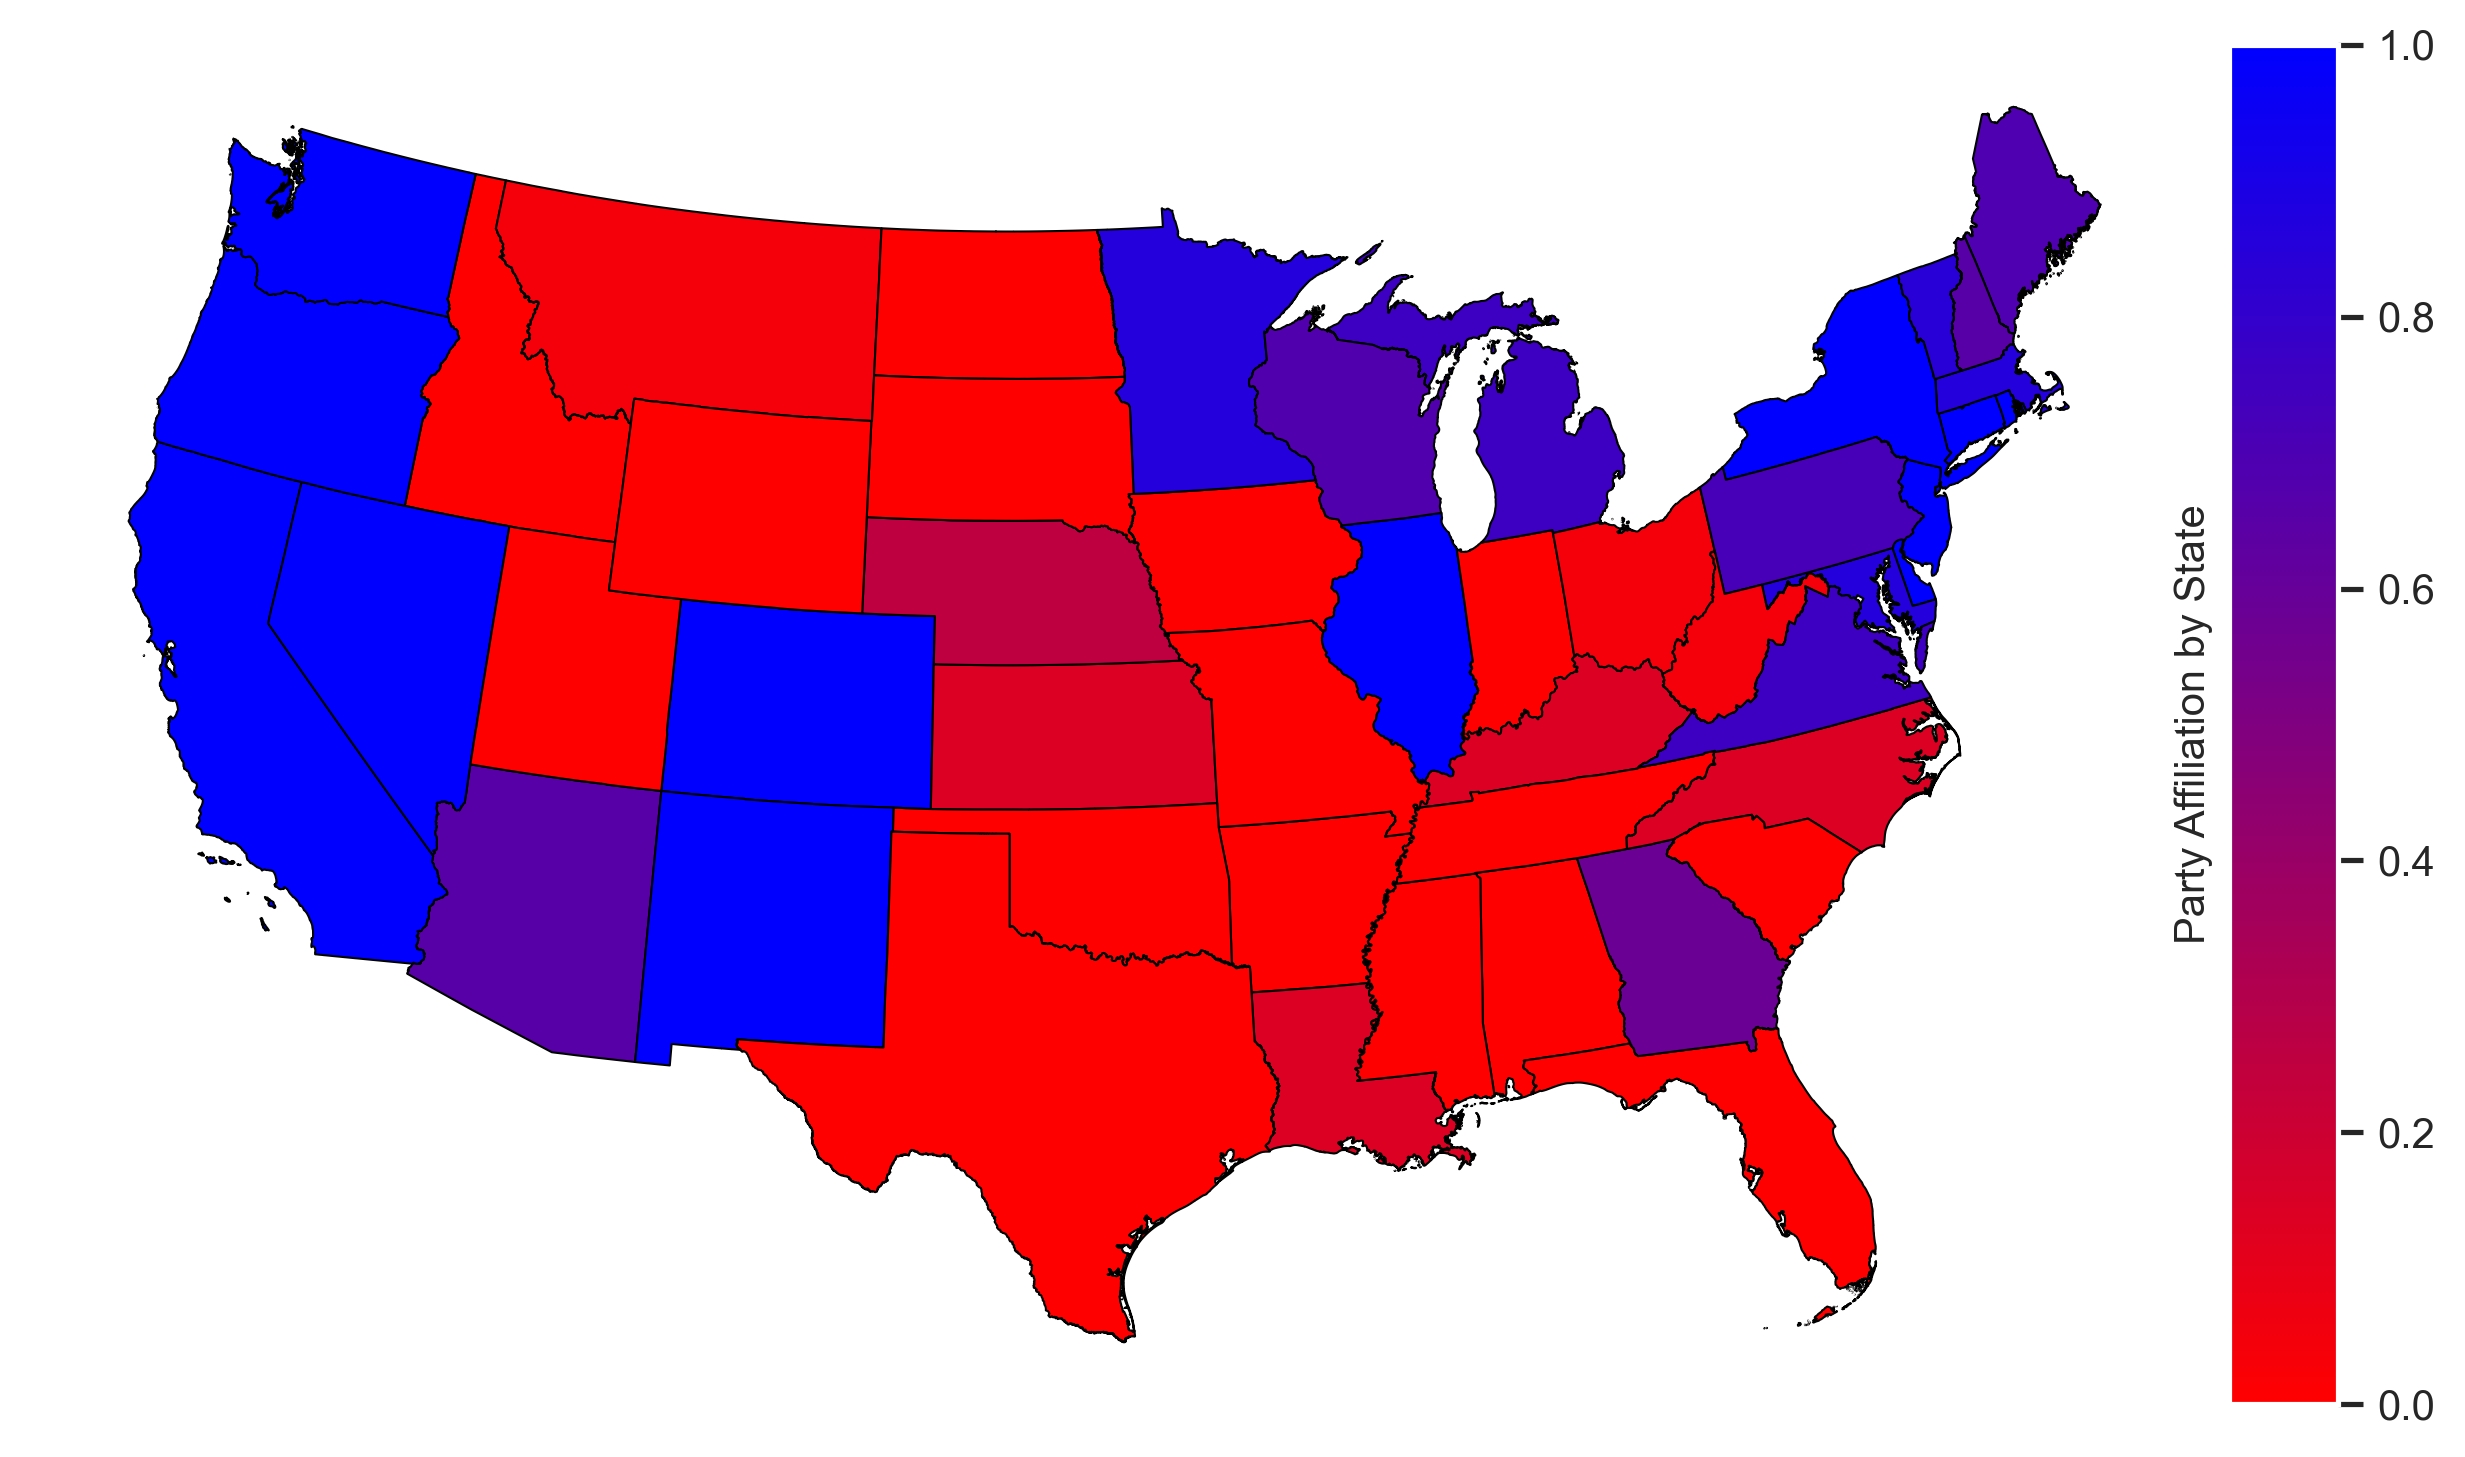

In [72]:
# Party affiliation by each staste

df_covid.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])


state_map = gpd.read_file(path+'cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# merging datasets
df_state_map = pd.merge(df_covid, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='party_score', cmap=cm1, legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('Party Affiliation by State',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

# Part 4: Net deaths from COVID-19
* We want to remove COVID-19-unrelated deaths.
* This way we can get the net deaths from COVID. 
* This will be a more accurate measure of impact by COVID 19. 

In [73]:
df_temp=df.groupby('Start Date')['COVID deaths'].sum().reset_index()
df_temp=df_temp.sort_values(by='Start Date', ascending=True)
df_temp.head(40)

,Start Date,COVID deaths
0,01/01/2020,2618556.0
1,01/01/2021,1730254.0
2,01/01/2022,1422783.0
3,02/01/2020,140.0
4,02/01/2021,315380.0
5,02/01/2022,360095.0
6,03/01/2020,63177.0
7,03/01/2021,190104.0
8,03/01/2022,146910.0
9,04/01/2020,297170.0


In [74]:
from datetime import datetime

df_temp['Start Date']=pd.to_datetime(df_temp['Start Date'], format='%m/%d/%Y')
df_temp.sort_values(by='Start Date').reset_index()
df_temp.head(40)

,Start Date,COVID deaths
0,2020-01-01,2618556.0
1,2021-01-01,1730254.0
2,2022-01-01,1422783.0
3,2020-02-01,140.0
4,2021-02-01,315380.0
5,2022-02-01,360095.0
6,2020-03-01,63177.0
7,2021-03-01,190104.0
8,2022-03-01,146910.0
9,2020-04-01,297170.0


* The data above are from 2.75 years. 

In [75]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Start Date    33 non-null     datetime64[ns]
 1   COVID deaths  33 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 792.0 bytes


In [76]:
deaths=pd.read_csv(path+'AH_Monthly_Provisional_Counts_of_Deaths_by_Age_Group_and_HHS_region_for_Select_Causes_of_Death__2019-2021.csv')

In [77]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 36 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Date Of Death Year                                                                                 3410 non-null   int64 
 1   Date Of Death Month                                                                                3410 non-null   int64 
 2   HHSRegion                                                                                          3410 non-null   object
 3   AgeGroup                                                                                           3410 non-null   object
 4   AllCause                                                                                           3400 non-null   object
 5  

In [78]:
deaths['Influenza and pneumonia (J09-J18)']=pd.to_numeric(deaths['Influenza and pneumonia (J09-J18)'], errors='coerce')

In [79]:
deaths.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,"2,022","1,764",17,23,NaN,0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2021,5,7,85 years and over,"3,373","3,241",31,397,64,228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,15-24 years,"2,340",626,NaN,123,31,0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,25-34 years,"4,616","1,623",31,268,82,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,35-44 years,"7,023","4,153",80,955,224,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
death_from_pneumonia_2019=deaths[deaths['Date Of Death Year']==2019]['Influenza and pneumonia (J09-J18)'].sum()
death_from_pneumonia_2019

71186.0

In [81]:
deaths.groupby('Date Of Death Year')['Influenza and pneumonia (J09-J18)'].sum()

Date Of Death Year
2019    71186.0
2020    75032.0
2021    38720.0
Name: Influenza and pneumonia (J09-J18), dtype: float64

In [82]:
df_subset=df[(df['Condition'].str.strip()=='Influenza and pneumonia') & (df['ICD10_codes'].str.strip()=='J09-J18')
            & (df['State'] != 'United States')]
df_subset['COVID deaths'].sum()

1022774.0

In [83]:
# Because the above data is 2.75 years long, we need to get the annual average.
covid_death_pneumonia_annual=df_subset['COVID deaths'].sum()/2.75
covid_death_pneumonia_annual

371917.8181818182

In [84]:
print("Annual net deaths from COVID-19-related influenza and pneumonia: "+str(round(df_subset['COVID deaths'].sum()/2.75-death_from_pneumonia_2019)))

Annual net deaths from COVID-19-related influenza and pneumonia: 300732
